Average TS profiles over my tidal analysis period.

In [1]:
import pandas as pd
import netCDF4 as nc
import numpy as np

import matplotlib.pyplot as plt

from nowcast import analyze 
from salishsea_tools import places

import datetime

%matplotlib inline

In [2]:
grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
mesh_mask = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')

tmask = mesh_mask.variables['tmask'][:]
gdept = mesh_mask.variables['gdept'][:]

In [3]:
PLACES = places.PLACES

d1=datetime.datetime(2014,11,26)
d2=datetime.datetime(2015,4,26)
files = analyze.get_filenames(d1,d2,'1d','grid_T','/results/SalishSea/nowcast/')

sals ={}
temps = {}
depths={}
masks={}
for name in ['Central node', 'East node']:
    j = PLACES[name]['NEMO grid ji'][0]
    i = PLACES[name]['NEMO grid ji'][1]
    sals[name], time = analyze.combine_files(files, 'vosaline', np.arange(40), j, i)
    temps[name], time = analyze.combine_files(files, 'votemper', np.arange(40), j, i)
    depths[name] = gdept[0,:,j,i]
    masks[name] = tmask[0,:,j,i]
    
    sals[name] = np.mean(sals[name], axis=0)
    temps[name] = np.mean(temps[name], axis=0)
    
    inds = np.where(masks[name]==1)
    sals[name] = sals[name][inds]
    temps[name] = temps[name][inds]
    depths[name] = depths[name][inds]

/data/nsoontie/MEOPAR/tools/SalishSeaNowcast/nowcast/analyze.py:171: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if kss == 'None':


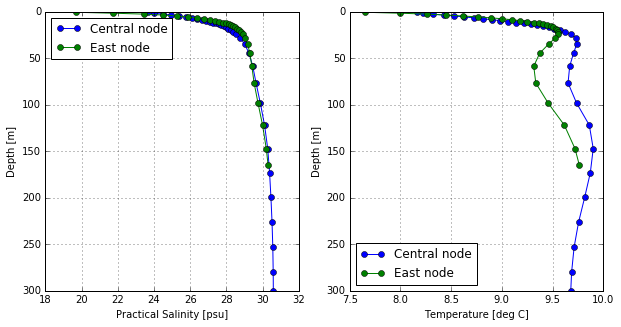

In [4]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
for name in ['Central node', 'East node']:
    ax=axs[0]
    ax.plot(sals[name],depths[name],'o-', label=name)
    ax.set_ylim([300,0])
    ax.set_xlabel('Practical Salinity [psu]')
    ax.set_ylabel('Depth [m]')
    
    ax=axs[1]
    ax.plot(temps[name],depths[name],'o-', label=name)
    ax.set_ylim([300,0])
    ax.set_xlabel('Temperature [deg C]')
    ax.set_ylabel('Depth [m]')
for ax in axs:
    ax.grid()
    ax.legend(loc=0)

Save using pandas

In [5]:
for name in ['Central node', 'East node']:
    data = pd.DataFrame({'Depth [m]': depths[name],
                         'Practical Salinity [psu]': sals[name],
                         'Temperature [deg C]': temps[name]})
    
    fname = '{}_meanTS_{}_{}.csv'.format(name[:-5], d1.strftime('%Y%m%d'), d2.strftime('%Y%m%d'))
    data.to_csv(fname)

In [6]:
!ls *.csv

Central_meanTS_20141126_20150426.csv  East_meanTS_20141126_20150426.csv


In [7]:
data

,Depth [m],Practical Salinity [psu],Temperature [deg C]
0,0.500000,19.681507,7.649859
1,1.500003,21.742039,7.993243
2,2.500011,23.447821,8.262228
3,3.500031,24.506578,8.452448
4,4.500071,25.250780,8.612563
5,5.500151,25.851595,8.760666
6,6.500310,26.347780,8.891456
7,7.500623,26.754166,9.002347
8,8.501236,27.090258,9.097125
9,9.502433,27.373615,9.179514
